In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_excel('c:/users/home/desktop/sample_result.xlsx')
#df.head()

In [70]:
import boto3
import json
import sys
import pandas as pd
from io import StringIO

sys.path.append('c:/users/home/desktop/BTXGH/instagramEDA')
from feature import *

bucketName = 'instagram-post'
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketName)

csv = pd.read_csv('c:/users/home/desktop/instagram-crawler_/instagram.csv', header=None, names=['username'])

obj = s3.Object('instagram-profile', 'profile_influencer.csv')
influencer_profile = pd.read_csv(obj.get()['Body'], index_col=0)

result = pd.DataFrame()

i = 0 

for json_file in my_bucket.objects.all():
    i+=1
    content_object = s3.Object(bucketName, json_file.key)
    file_content = content_object.get()['Body'].read().decode('utf-8')
    data = json.loads(file_content)

    username = csv.loc[json_file.key[:-5]][0]

    influencer = {'name': username,
            'youtube': json_file.key[:-5],
            'avg_hashtag': avg_hashtags(data),   
            'avg_comment': avg_comments(data),
            'avg_self_comment': avg_self_comments(data, username),
            'post_interval': post_interval(data),
            'ppl_img_ratio': ppl_img_ratio(data),
            'comment_user_num': str(user_comment(data)),
            'lang_ratio': str(lang_detection(data))}   

    result = pd.concat([result, pd.DataFrame(influencer)])
        
    #print(i,'out of',csv.shape[0])

1 out of 317
2 out of 317
3 out of 317
4 out of 317
5 out of 317
6 out of 317
7 out of 317
8 out of 317
9 out of 317
10 out of 317
11 out of 317
12 out of 317
13 out of 317
14 out of 317
15 out of 317
16 out of 317
17 out of 317
18 out of 317
19 out of 317
20 out of 317
21 out of 317
22 out of 317
23 out of 317
24 out of 317
25 out of 317
26 out of 317
27 out of 317
28 out of 317
29 out of 317
30 out of 317
31 out of 317
32 out of 317
33 out of 317
34 out of 317
35 out of 317
36 out of 317
37 out of 317
38 out of 317
39 out of 317
40 out of 317
41 out of 317
42 out of 317
43 out of 317
44 out of 317
45 out of 317
46 out of 317
47 out of 317
48 out of 317
49 out of 317
50 out of 317
51 out of 317
52 out of 317
53 out of 317
54 out of 317
55 out of 317
56 out of 317
57 out of 317
58 out of 317
59 out of 317
60 out of 317
61 out of 317
62 out of 317
63 out of 317
64 out of 317
65 out of 317
66 out of 317
67 out of 317
68 out of 317
69 out of 317
70 out of 317
71 out of 317
72 out of 317
7

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [72]:
total = pd.merge(result, influencer_profile, left_on='name', right_on='username')
total.head()

In [103]:
import boto3
import json
import sys
import pandas as pd
from io import StringIO

sys.path.append('c:/users/home/desktop/BTXGH/instagramEDA')
from feature import *

bucketName = 'instagram-post'
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketName)

csv = pd.read_csv('c:/users/home/desktop/instagram-crawler_/instagram.csv', header=None, names=['username'])

obj = s3.Object('instagram-profile', 'profile_influencer.csv')
influencer_profile = pd.read_csv(obj.get()['Body'], index_col=0)

result = pd.DataFrame()

i = 0 

for json_file in my_bucket.objects.all():
    i+=1
    content_object = s3.Object(bucketName, json_file.key)
    file_content = content_object.get()['Body'].read().decode('utf-8')
    try:
        data = json.loads(file_content)
        
        username = csv.loc[json_file.key[:-5]][0]

        caption = []
        comments = []
        hashtags = []
        likes = []
        for post in data:
            if post.get('caption'):
                caption.append(post.get('caption'))
            else:
                caption.append('0')
            if post.get('comments'):
                comments.append(post.get('comments')) 
            else:
                comments.append('0')
            if post.get('hashtags'):
                hashtags.append(post.get('hashtags')) 
            else:
                hashtags.append('0')
            if post.get('likes'):
                likes.append(post.get('likes')) 
            else:
                likes.append('0')
            post_info = {'name': username, 'caption': caption, 'comments': comments, 'hashtags': hashtags, 'likes': likes}
            post_info = dict(default, **post_info)

            result = pd.concat([result, pd.DataFrame(post_info)])
    except:
        pass
        
    #print(i,'out of',csv.shape[0])

# EDA용 dataframe: post를 한 row로

In [104]:
df = pd.merge(total, result, on='name')
df = df.loc[df.astype(str).drop_duplicates().index]
df.head()

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,...,num_of_posts,followers,following,bio_url,isprivate,scraped,caption,comments,hashtags,likes
0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,0,0,0,17863
2,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,0,0,0,3007
5,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,💕,"[{'author': 'kariacostav', 'comment': '😍😍'}, {...",0,3381
9,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,안경끼니까 뽀로로같네,"[{'author': 'ping_siewsook', 'comment': '😚❤️❤️...",0,14918
14,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,내가 가장 좋아하는 바닷가 :속초,"[{'author': 'perrenelle', 'comment': '😍😍😍'}, {...",0,9342


In [108]:
df.columns

Index(['name', 'youtube', 'avg_hashtag', 'avg_comment', 'avg_self_comment',
       'post_interval', 'ppl_img_ratio', 'comment_user_num', 'lang_ratio',
       'alias', 'username', 'bio', 'num_of_posts', 'followers', 'following',
       'bio_url', 'isprivate', 'scraped', 'caption', 'comments', 'hashtags',
       'likes'],
      dtype='object')

In [114]:
df[['avg_hashtag', 'avg_comment', 'avg_self_comment','post_interval', 'ppl_img_ratio']]=df[['avg_hashtag', 'avg_comment', 'avg_self_comment','post_interval', 'ppl_img_ratio']].astype(float)
df[['num_of_posts', 'followers', 'following','likes']]=df[['num_of_posts', 'followers', 'following','likes']].astype(int)

In [256]:
df.to_csv('c:/users/home/desktop/total_data.csv', index=None)

In [90]:
def plot_compare(x_axis, y_axis,x_name,y_name, index='None'):
    if index != 'None':
        plt.scatter(x_axis, y_axis, alpha=0.5)
        color = ['b'] * len(x_axis)
        color[index] = 'r'
        plt.scatter(x_axis, y_axis, color = color, alpha=0.5)
    else:
        plt.scatter(x_axis, y_axis, alpha=0.5)
        
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.show()
    
def find_index(input_df, artist):
    return list(input_df['name']).index(artist)

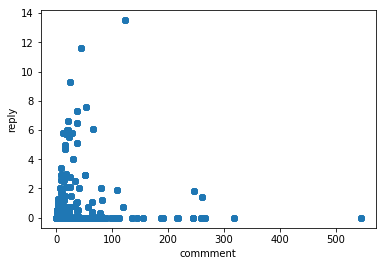

In [94]:
plot_compare(df['avg_comment'], df['avg_self_comment'], 'commment', 'reply')

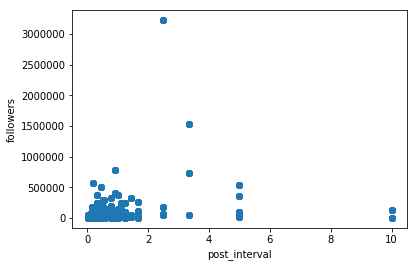

In [233]:
plot_compare(df['post_interval'], df['followers'], 'post_interval', 'followers')

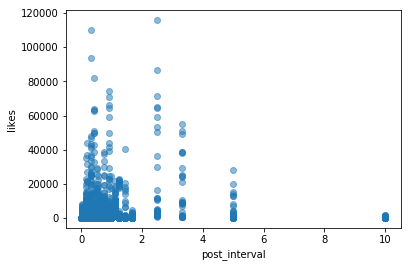

In [234]:
plot_compare(df['post_interval'], df['likes'], 'post_interval', 'likes')

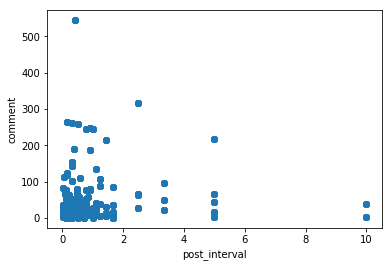

In [95]:
plot_compare(df['post_interval'], df['avg_comment'], 'post_interval', 'comment')

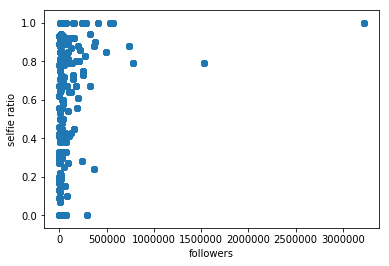

In [236]:
plot_compare(df['followers'], df['ppl_img_ratio'], 'followers', 'selfie ratio')

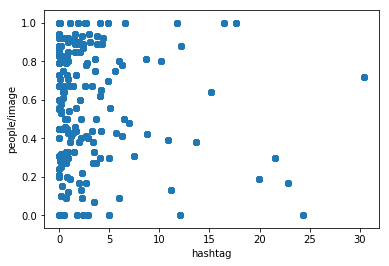

In [96]:
plot_compare(df['avg_hashtag'], df['ppl_img_ratio'], 'hashtag', 'people/image')

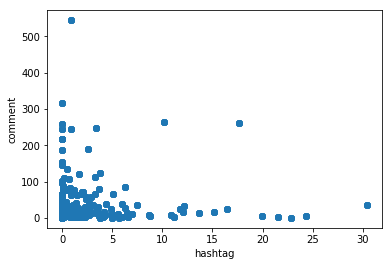

In [97]:
plot_compare(df['avg_hashtag'], df['avg_comment'], 'hashtag', 'comment')

In [106]:
df['likes'].astype(int).mean()

4351.004772004242

35


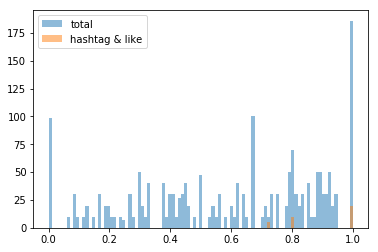

In [122]:
post = df[(df.avg_hashtag > 10) & (df.likes > 5000)]
print(post.shape[0])

bins = np.linspace(0, 1, 100)

plt.hist(df['ppl_img_ratio'], bins, alpha=0.5, label='total')
plt.hist(post['ppl_img_ratio'], bins, alpha=0.5, label='hashtag & like')
plt.legend(loc='upper left')
plt.show()

In [153]:
hashtags = df['hashtags'].tolist()
num_of_hashtags = []
for tag in hashtags:
    if tag != '0':
        num_of_hashtags.append(len(tag))
    else:
        num_of_hashtags.append(0)
df['num_of_hashtags'] = pd.DataFrame(num_of_hashtags).astype(int)
        
#df['hashtags'][112]

In [155]:
df['num_of_hashtags'].mean()

2.940983606557377

21

아리키친(ARIKITCHEN)    5
Ko Hyojoo           4
Serim Hong          3
Bella&Lucas         2
순이                  2
Euddeum shim        2
남순(박현우)             1
혜서니                 1
정 선호                1
Name: alias, dtype: int64

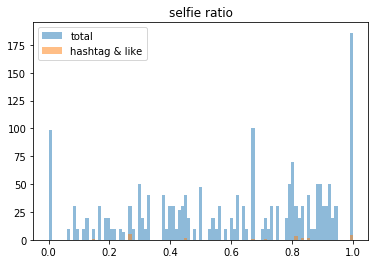

In [162]:
post = df[(df.num_of_hashtags > 5) & (df.likes > 1000)]
display(post.shape[0], post['alias'].value_counts())

bins = np.linspace(0, 1, 100)

plt.hist(df['ppl_img_ratio'], bins, alpha=0.5, label='total')
plt.hist(post['ppl_img_ratio'], bins, alpha=0.5, label='hashtag & like')
plt.legend(loc='upper left')
plt.title('selfie ratio')
plt.show()

In [177]:
df['reply_ratio'] = df['avg_self_comment']/df['avg_comment']*100

In [199]:
df.drop_duplicates('username').sort_values('reply_ratio', ascending=False)[['alias', 'reply_ratio', 'followers']][:10]

,alias,reply_ratio,followers
9241,JAELIM 💘,45.833333,11844
6160,김수진 (셀프어쿠스틱),44.615385,6608
8691,Hye Young Rhee,42.857143,2407
2585,슬림앤파워 대표 리쌤 (바벨라토르),39.534884,18896
165,이지훈,38.461538,919
8856,홍시대장,38.114754,455
7838,도엽,37.142857,756
10561,조영근,34.523810,53108
7453,민호타우르스,33.333333,899
9901,Danse Jin (춤추는선진이),33.333333,15812


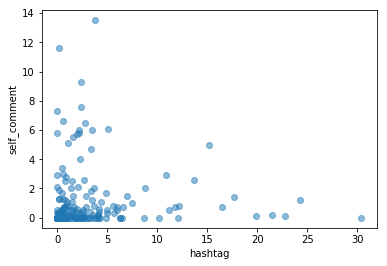

In [23]:
plot_compare(df['avg_hashtag'], df['avg_self_comment'], 'hashtag', 'self_comment')

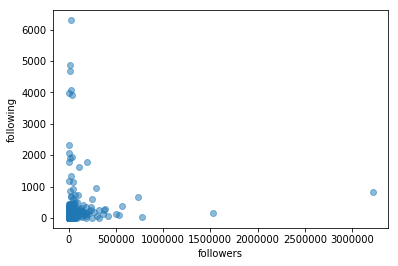

In [24]:
plot_compare(df['followers'], df['following'], 'followers', 'following')

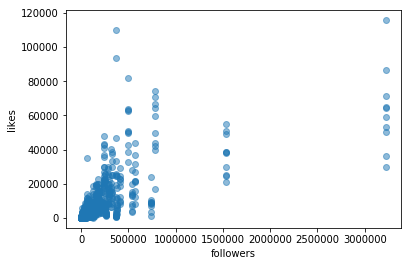

In [202]:
plot_compare(df['followers'], df['likes'], 'followers', 'likes')

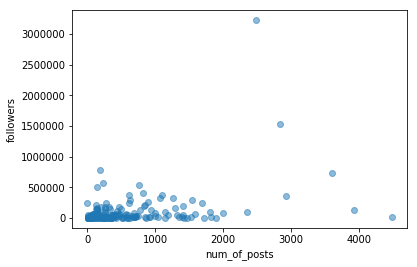

In [25]:
plot_compare(df['num_of_posts'], df['followers'], 'num_of_posts', 'followers')

Slope: -0.002
Intercept: 1.181


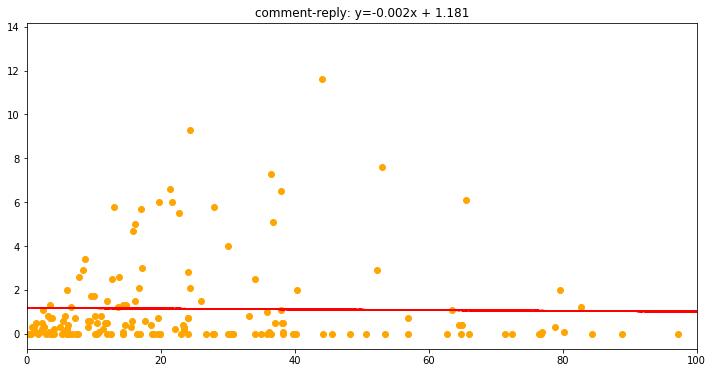

In [29]:
ax = df['avg_comment']
ay = df['avg_self_comment']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 100)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('comment-reply: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: -1.210
Intercept: 48.874


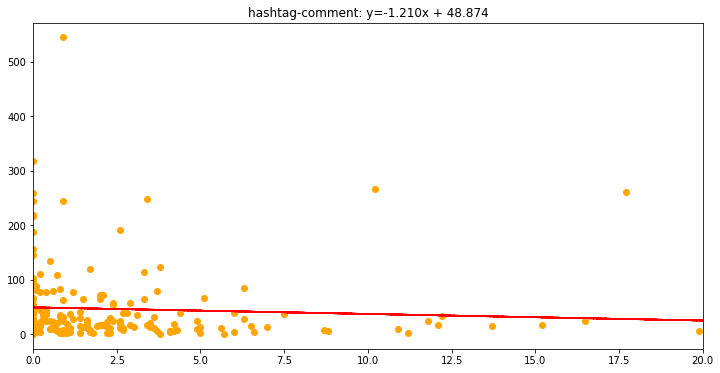

In [31]:
ax = df['avg_hashtag']
ay = df['avg_comment']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 20)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('hashtag-comment: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: 0.025
Intercept: 1783.417


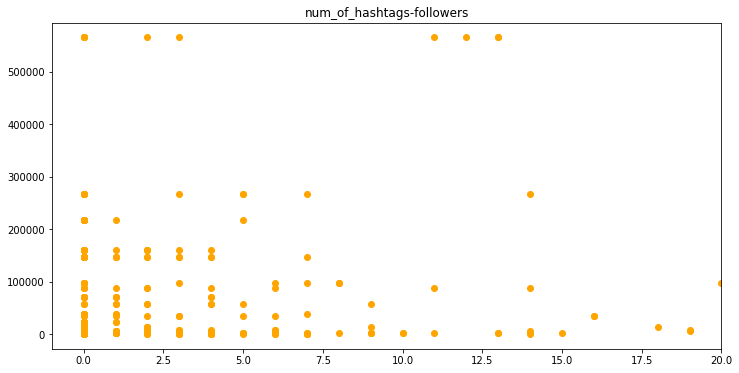

In [211]:
ax = df['num_of_hashtags']
ay = df['followers']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-1, 20)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('num_of_hashtags-followers')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: nan
Intercept: nan


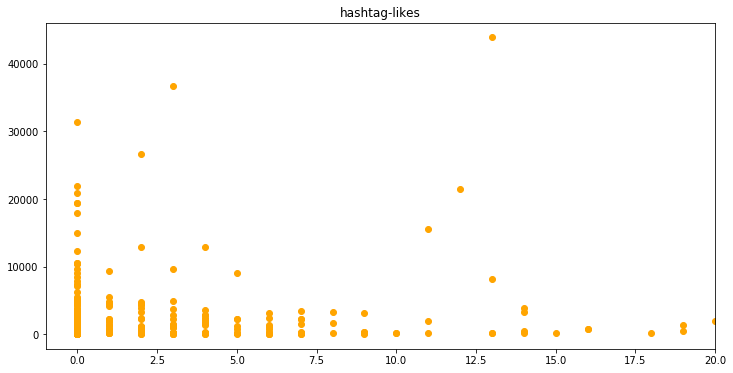

In [188]:
ax = df['num_of_hashtags']
ay = df['likes']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-1, 20)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('num_of_hashtags-likes')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [232]:
df[(df.num_of_hashtags > 10)][['followers', 'alias', 'caption', 'likes', 'username', 'hashtags']]

,followers,alias,caption,likes,username,hashtags
222,6397,한상기 Han Sang Ki,현대 베뉴 스마트스트림 G1.6.\n사진보다 예쁘고 차는 작네요\n시승기는 새벽까지...,520,hansangki0755,"[현대베뉴, 한상기, 집에서멀어요]"
264,6397,한상기 Han Sang Ki,"포르쉐 911 GT3.\n간만에 느껴보는 9,000 rpm의 맛.\n그동안 자연흡기...",400,hansangki0755,"[그래서난카이엔, 터보가짱, 991GT3, 포르쉐월드로드쇼, 한상기]"
295,8126,Bella&Lucas,드디어 내일!!! 저희 앨범이 발매됩니다!!!!!!❤️🧡💛내일 8시에 저희 앨범 타...,1316,bellawithlucas,"[newalbum, 앨범발매, bellu, 벨루]"
440,88279,Serim Hong,오... 홍지연 사진 잘찍네... ㅇㅈ..\n.\n#근데 #이기세라면 #3kg #쪄...,1863,serim.hong.50,"[근데, 이기세라면, 3kg, 쪄가는건, 시간문제일듯]"
442,88279,Serim Hong,코코넛 안좋아하는데 맛나네요 #콩카페 !\n🥥🥥🥥🥥,3854,serim.hong.50,[콩카페]
570,14170,조싀앤바믜🇰🇷🎗,조싀앤바믜 X 여리여리 #레몬밤 공구!\n💋 18900-> 14900 💋\n⠀\n처...,115,josh_bamui,"[레몬밤, 다이어트]"
577,14170,조싀앤바믜🇰🇷🎗,0,120,josh_bamui,0
632,35389,공대생가족,여행에서 남는건 역시 사진,720,gdsfamily4,0
649,35389,공대생가족,꽁냥이는 왜 이렇게 잘까요\n냄새나게ᆢ,739,gdsfamily4,0
729,160048,순이,어쩌다 여유로워☺️,3732,h_ue_,0


In [227]:
df[(df.num_of_hashtags > 5) & (df.likes > 10000)][['followers', 'alias', 'caption', 'likes']]

,followers,alias,caption,likes


In [247]:
df[(df.alias == 'Ko Hyojoo')]

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,...,isprivate,scraped,caption,comments,hashtags,likes,num_of_hashtags,reply_ratio,followers_likes,likes/followers
1650,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,🌞🌪 Full ver is on my Youtube channel 🌞🌪\nThese...,"[{'author': 'voit9', 'comment': '@marta_lucive...","[longboarding, longboarddancing, longboarder, ...",21546,12.0,2.916667,0.038102,0.038102
1652,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,This is a TVC of LUX shampoo which is broadcas...,"[{'author': 'ken_boat', 'comment': 'Is it a TV...","[longboard, longboarding, longboardvideo, TVC,...",8121,13.0,2.916667,0.014361,0.014361
1655,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,"Sometimes, people tell me “I thought longboard...","[{'author': 'nguterrence', 'comment': 'WoW, be...","[followmyride, Tods, longboard, todsgommino, l...",43920,13.0,2.916667,0.077668,0.077668
1659,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,Swipe to see a full version➡️\n🍭🍧🍸💎\nA Global ...,"[{'author': 'hyo_joo', 'comment': '@ruliayunur...","[longboard, longboarding, longborder, swarovsk...",21909,0.0,2.916667,0.038744,0.038744
1664,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,MUCH FUN PRACTICE in venice beach\n-\nThese da...,"[{'author': 'kayavelocet', 'comment': '😍😍😍😍😍'}...","[rollerskates, roller, rollersk8, rollergirl, ...",36667,3.0,2.916667,0.064842,0.064842
1670,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,여러분! 올해는 좋은 일들이 많이 생기는것 같아요\n상하이에서 첫 공개되는 끌로에 ...,"[{'author': 'hyo_joo', 'comment': '@evelynlyx ...","[ChloeSPRING20, ChloeGIRLS, ChloeSHANGHAI, Chl...",15604,11.0,2.916667,0.027594,0.027594
1677,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,드디어 (아마 저 혼자) 기다리고 기다리던 클래쉬 드 까르띠에 파리 런칭행사 본 영...,"[{'author': 'y.wrong73', 'comment': '❤️❤️😍'}, ...","[ClashdeCartier, 클래쉬드까르띠에, CartierParty, 까르띠에,...",26731,2.0,2.916667,0.047271,0.047271
1685,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,I was here to shoot <Charles & Keith> in my fa...,"[{'author': 'livinghollow', 'comment': 'the me...","[CHARLESKEITHSS19, Longboard, longboarding, lo...",31424,0.0,2.916667,0.055570,0.055570
1694,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,"Teaser video <Clash de Cartier>, Paris\n한 달이 지...","[{'author': 'yishan_nakaw', 'comment': '@ryner...","[ClashdeCartier, 클래쉬드까르띠에, CartierParty, 까르띠에,...",20882,0.0,2.916667,0.036928,0.036928
1704,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,"⏱⏱⏱\nCK Watch Project about “My First time”, i...","[{'author': 'minoo.a22', 'comment': 'Beautiful...","[MYCALVI

In [248]:
df[(df.num_of_hashtags > 12) &(df.alias == 'Ko Hyojoo')][['followers', 'alias', 'caption', 'likes', 'num_of_hashtags']]

,followers,alias,caption,likes,num_of_hashtags
1652,565484,Ko Hyojoo,This is a TVC of LUX shampoo which is broadcas...,8121,13.0
1655,565484,Ko Hyojoo,"Sometimes, people tell me “I thought longboard...",43920,13.0


Slope: 0.025
Intercept: 1783.417


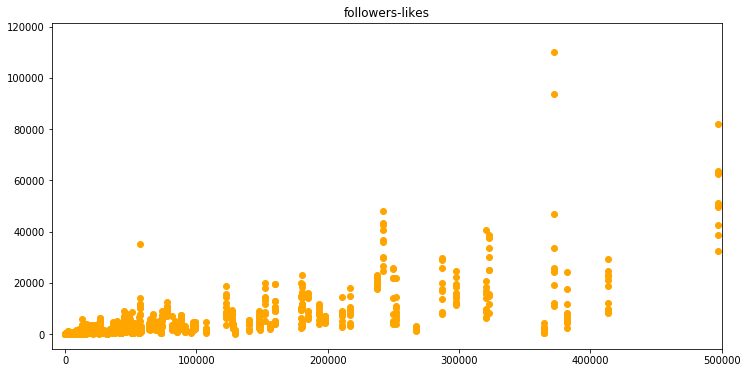

In [209]:
ax = df['followers']
ay = df['likes']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-10000, 500000)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('followers-likes')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [208]:
df['likes/followers'] = df['likes']/df['followers']
df.drop_duplicates('username').sort_values('likes/followers', ascending=False)[['alias', 'likes/followers', 'followers']][:10]

,alias,likes/followers,followers
8251,Becky&Tommy 베키&타미,0.252794,1879
3740,koi,0.251993,2258
3080,Dragon Stone,0.206768,56943
8113,과학쿠키,0.202509,558
5005,밥지,0.191400,15674
8526,리뷰엉이,0.174515,361
3905,Elise 🐻,0.160419,26356
5665,JM,0.156951,12660
2420,유승엽,0.154293,3273
9351,유소나,0.153481,26303


Slope: nan
Intercept: nan


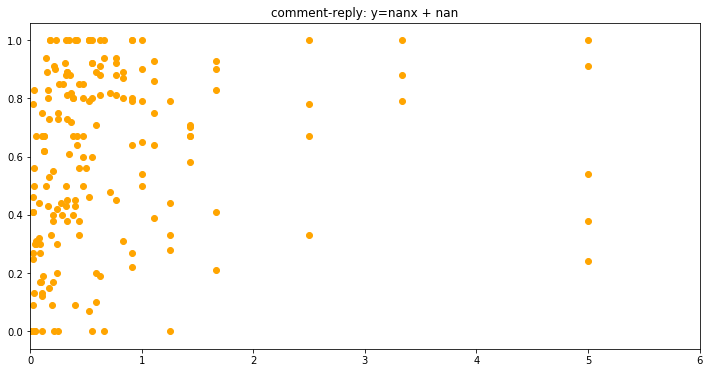

In [33]:
ax = df['post_interval']
ay = df['ppl_img_ratio']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 6)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('comment-reply: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: nan
Intercept: nan


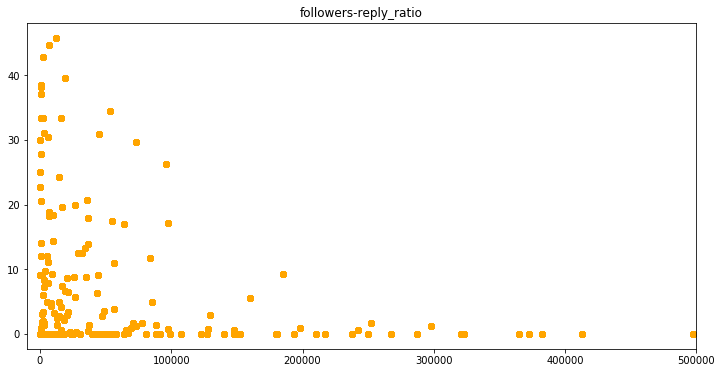

In [198]:
ax = df['followers']
ay = df['reply_ratio']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-10000, 500000)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('followers-reply_ratio')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: nan
Intercept: nan


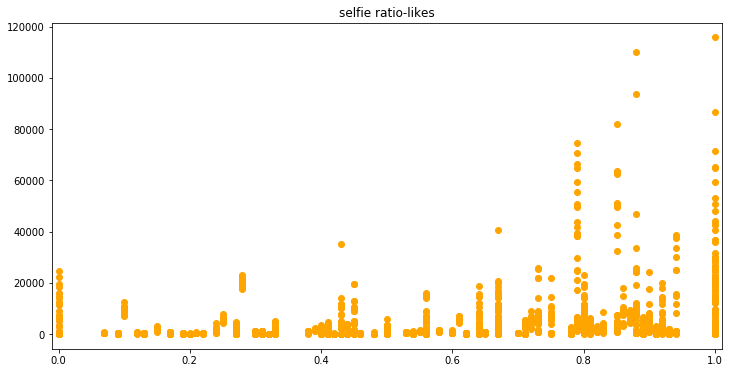

In [243]:
ax = df['ppl_img_ratio']
ay = df['likes']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-0.01,1.01)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('selfie ratio-likes')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [249]:
df[(df.ppl_img_ratio > 0.8)][['followers', 'alias', 'caption', 'likes', 'username', 'hashtags']]

,followers,alias,caption,likes,username,hashtags
0,217262,Kim Nam Woo,0,17863,0__0man,0
2,217262,Kim Nam Woo,0,3007,0__0man,0
5,217262,Kim Nam Woo,💕,3381,0__0man,0
9,217262,Kim Nam Woo,안경끼니까 뽀로로같네,14918,0__0man,0
14,217262,Kim Nam Woo,내가 가장 좋아하는 바닷가 :속초,9342,0__0man,0
20,217262,Kim Nam Woo,Tiktok : 0__0man 내가하면서도 현타...,7804,0__0man,0
27,217262,Kim Nam Woo,Can u speak Germany ?,4351,0__0man,0
35,217262,Kim Nam Woo,가을아 빨리와🍂,10406,0__0man,0
44,217262,Kim Nam Woo,점점 구릿빛얼굴이 되간다,9054,0__0man,0
54,217262,Kim Nam Woo,1인칭시점😏 어색,7372,0__0man,0


In [255]:
df.drop_duplicates('username').sort_values(['ppl_img_ratio', 'likes/followers'], ascending=False)[['alias', 'followers', 'likes/followers']][:10]

,alias,followers,likes/followers
3355,Lisa Rhee,242461,0.122733
5280,최마태의 PostIT,18474,0.103822
9186,도영도영이🍦,36704,0.099826
3685,GOD DONGMIN(갓동민),20821,0.097930
8416,데이브 (Dave),287031,0.069233
7068,청춘여락,67111,0.068260
5445,심짱골프,8257,0.057769
5720,tae,22517,0.054581
4565,Raon Lee,413194,0.045584
1650,Ko Hyojoo,565484,0.038102


# 팔로워들의 유형

- 인플루언서 제외 일반인들 (인플루언서의 팔로워 2500명 씩 * 000명)의 팔로워-팔로잉 플롯
- 4유형 정도로 나누고 각 인플루언서당 어느 유형의 팔로워가 몇프로씩 있는지 수치화
- 팔로워, 팔로잉 수 말고 성별 등 추가해서 유형화?